In [23]:
import pickle
import numpy as np
import pomegranate as pom
import sys
sys.path.append('../src')
from visualization import draw_timeline_with_states, save_png, draw_distribution
from variables import toys_dict, tasks, toys_list
import matplotlib.pyplot as plt

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.utils import check_random_state

import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import pandas as pd

from pathlib import Path
import os 
import importlib
from collections import OrderedDict
import itertools


### Param

In [4]:
n_features = 4

In [3]:
def convert_to_int(list_to_convert):
    converted_list = []
    for i in list_to_convert:
        i = i.astype(int)
        converted_list.append(i)
    return converted_list

def convert_to_list_seqs(big_seq, len_array):
    big_seq_to_slice = big_seq.copy()
    list_of_seqs = []
    
    for k in len_array:
        list_of_seqs.append(big_seq_to_slice[:k])
        big_seq_to_slice = big_seq_to_slice[k:]
    return list_of_seqs

def save_csv(df, file_path, file_name):
    if not os.path.exists(file_path):
        file_path.mkdir(parents=True)
    save_path = file_path / file_name
    df.to_csv(save_path)

### 2 minute

In [6]:
with open('../data/interim/20210701_feature_engineering_1.5_min.pickle', 'rb') as f:
    feature_dict = pickle.load(f)

with open('../data/interim/20210701_label_1.5_min.pickle', 'rb') as f:
    labels_dict = pickle.load(f)

In [5]:
# task_specific_feature = feature_dict['MPS']
interval_length = 1.5  # every 2 minutes
no_ops_threshold = 5/60
new_toy_threshold = 2

shift_time_list = np.arange(0, interval_length, .25)

len_list = []

input_list = np.empty((0, n_features))
input_list_ = np.empty((0, n_features))

for task in tasks:
    for subj, shifted_df_dict in feature_dict[task].items():
        for shift_time, feature_vector in shifted_df_dict.items():
            # print(feature_vector)
            input_list = np.vstack((input_list, feature_vector))
            input_list_ = np.concatenate((input_list_, feature_vector))

            len_list.append(len(feature_vector))

In [15]:
i = 0
for task in tasks:
    for subj, shifted_df_dict in feature_dict[task].items():
        for shift_time, feature_vector in shifted_df_dict.items():
            
            if shift_time == 0 and (feature_vector[:,0] >= 2).any():
                print(subj, task, feature_vector[:,0])
                # print(subj, task, shift_time)

1 MPS [2. 4. 5. 7. 4. 5.]
10 MPS [3. 0. 2. 2. 2. 1.]
11 MPS [ 5.  8. 10.  8.  5.  5.]
12 MPS [3. 0. 0. 6. 2. 5.]
13 MPS [ 1.  5. 20. 31. 22. 10.]
15 MPS [ 9. 11. 11.  7.  7.  7.]
17 MPS [10.  9.  9. 13. 16.  6.]
18 MPS [ 6.  9. 14.  9. 24. 17.]
19 MPS [12.  3.  5. 13. 10.  7.]
2 MPS [8. 5. 1. 8. 4.]
20 MPS [0. 2. 2. 7. 4.]
21 MPS [9. 9. 8. 8. 7. 5.]
22 MPS [ 3. 11.  2.  9.  0.  5.]
24 MPS [16. 14. 11. 18. 19. 14.]
25 MPS [15. 10.  4.  9. 14.]
26 MPS [ 9.  5. 19.  8. 12.  6.]
27 MPS [ 7. 20. 13. 17. 16. 18.]
28 MPS [5. 5. 2. 7. 6. 5.]
29 MPS [16. 14. 16. 19. 19.  9.]
3 MPS [ 2.  8.  2. 12.  9.  4.]
30 MPS [5. 8. 5. 6. 6.]
31 MPS [ 7.  8. 13.  9. 10.  4.]
32 MPS [6. 3. 8. 4. 7.]
33 MPS [5. 5. 2. 6. 4. 5.]
34 MPS [ 5.  7.  8.  7. 10.]
35 MPS [ 5. 12.  5. 11.  7.  6.]
36 MPS [ 7. 11. 15. 10.  6.]
37 MPS [6. 8. 4. 2. 6. 7.]
40 MPS [22. 22. 13. 16. 12.  9.]
41 MPS [2. 2. 0. 0. 2. 3.]
42 MPS [5. 3. 3. 6. 6. 4.]
43 MPS [12. 10.  6. 20. 12.]
44 MPS [2. 6. 4. 7. 4. 3.]
45 MPS [ 7.  3. 12.  5. 12

In [40]:
for subj, shifted_df_dict in feature_dict["NMS"].items():
    for shift_time, feature_vector in shifted_df_dict.items():

        # if shift_time == 0 and (feature_vector[:,0] >= 2).any():
            print(subj, task, len(feature_vector[:,0]))

1 NMS 5
1 NMS 5
1 NMS 5
1 NMS 5
1 NMS 5
1 NMS 5
10 NMS 5
10 NMS 5
10 NMS 5
10 NMS 5
10 NMS 5
10 NMS 5
11 NMS 6
11 NMS 5
11 NMS 5
11 NMS 5
11 NMS 5
11 NMS 5
12 NMS 6
12 NMS 5
12 NMS 5
12 NMS 5
12 NMS 5
12 NMS 5
13 NMS 6
13 NMS 6
13 NMS 5
13 NMS 5
13 NMS 5
13 NMS 5
15 NMS 6
15 NMS 5
15 NMS 5
15 NMS 5
15 NMS 5
15 NMS 5
17 NMS 7
17 NMS 7
17 NMS 7
17 NMS 6
17 NMS 6
17 NMS 6
18 NMS 7
18 NMS 7
18 NMS 7
18 NMS 6
18 NMS 6
18 NMS 6
19 NMS 6
19 NMS 6
19 NMS 5
19 NMS 5
19 NMS 5
19 NMS 5
2 NMS 6
2 NMS 5
2 NMS 5
2 NMS 5
2 NMS 5
2 NMS 5
20 NMS 5
20 NMS 5
20 NMS 5
20 NMS 5
20 NMS 5
20 NMS 5
21 NMS 6
21 NMS 6
21 NMS 6
21 NMS 6
21 NMS 5
21 NMS 5
22 NMS 6
22 NMS 6
22 NMS 6
22 NMS 6
22 NMS 6
22 NMS 6
24 NMS 6
24 NMS 6
24 NMS 6
24 NMS 5
24 NMS 5
24 NMS 5
25 NMS 6
25 NMS 5
25 NMS 5
25 NMS 5
25 NMS 5
25 NMS 5
26 NMS 6
26 NMS 5
26 NMS 5
26 NMS 5
26 NMS 5
26 NMS 5
27 NMS 7
27 NMS 7
27 NMS 6
27 NMS 6
27 NMS 6
27 NMS 6
28 NMS 6
28 NMS 5
28 NMS 5
28 NMS 5
28 NMS 5
28 NMS 5
29 NMS 5
29 NMS 5
29 NMS 5
29 NMS 5
29 N

In [5]:
plt.hist(input_list[:,0])

NameError: name 'input_list' is not defined

### 1.5 min - cleaned

In [2]:
with open('../data/interim/20210718_feature_engineering_1.5_min.pickle', 'rb') as f:
    feature_dict_1_5 = pickle.load(f)

with open('../data/interim/20210718_label_1.5_min.pickle', 'rb') as f:
    labels_dict_1_5 = pickle.load(f)

In [6]:
input_list_1_5 = np.empty((0, n_features))
task_based_feature = {}
task_based_len = {}
len_list_1_5 = []

for task in tasks:
    task_based_feature[task] = []
    task_based_len[task] = []
    for subj, shifted_df_dict in feature_dict_1_5[task].items():
        for shift_time, feature_vector in shifted_df_dict.items():
            # print(feature_vector)
            input_list_1_5 = np.vstack((input_list_1_5, feature_vector))
            len_list_1_5.append(len(feature_vector))
            task_based_feature[task].append(feature_vector)
            task_based_len[task].append(len(feature_vector)) 

(array([2174., 1411.,  857.,  387.,  129.,   52.,   37.,   22.,    7.,
           5.]),
 array([ 0. ,  3.2,  6.4,  9.6, 12.8, 16. , 19.2, 22.4, 25.6, 28.8, 32. ]),
 <BarContainer object of 10 artists>)

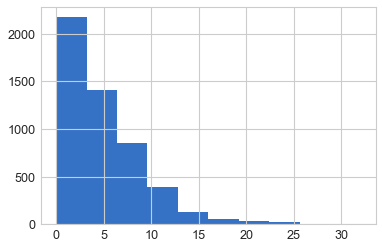

In [7]:
# len(task_based_feature["MPS"])
plt.hist(input_list_1_5[:,0])

In [10]:
i = 0
for task in tasks:
    for subj, shifted_df_dict in feature_dict_1_5[task].items():
        for shift_time, feature_vector in shifted_df_dict.items():
            
            if shift_time == 0 and (feature_vector[:,0] >= 20).any():
                print(subj, task, feature_vector[:,0])
                # print(subj, task, shift_time)

17 MPM [12.  7. 11. 24. 18.  4.]
2 MPM [20.  8.  8.  5.  8.]
25 MPM [ 6. 24. 14.  9.  4.  1.]
37 NMS [ 6. 22.  7.  5. 15.  1.]
17 NMM [10.  6. 16. 20. 15.]
30 NMM [ 7. 24. 20. 29.  6.]
36 NMM [17. 21.  6.  3.  2.  4.]
8 NMM [25.  5. 16. 17.  8.  8.]


## Avg of each task

Aggregate, all

In [21]:
# task_based_feature['MPS'][0].shape
switches_mps = [i[:,0].tolist() for i in task_based_feature['MPS']]
switches_mpm = [i[:,0] for i in task_based_feature['MPM']]
switches_nms = [i[:,0] for i in task_based_feature['NMS']]
switches_nmm = [i[:,0] for i in task_based_feature['NMM']]


Text(0.5, 1.0, 'Avg. # toy switches per 1.5 minutes in each condition')

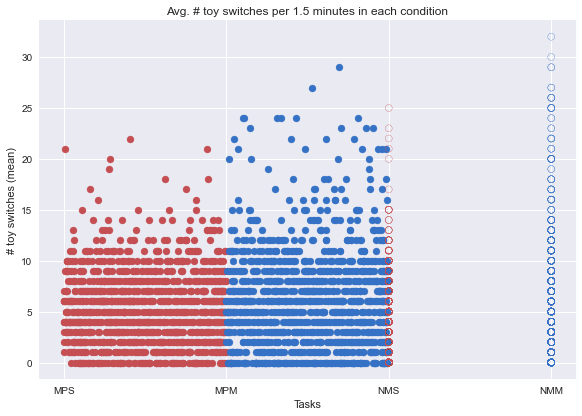

In [94]:
mean_mps = np.mean(list(itertools.chain.from_iterable(switches_mps)))
std_mps = np.std(list(itertools.chain.from_iterable(switches_mps)))

mean_mpm = np.mean(list(itertools.chain.from_iterable(switches_mpm)))
std_mpm = np.std(list(itertools.chain.from_iterable(switches_mpm)))

mean_nms = np.mean(list(itertools.chain.from_iterable(switches_nms)))
std_nms = np.std(list(itertools.chain.from_iterable(switches_nms)))

mean_nmm = np.mean(list(itertools.chain.from_iterable(switches_nmm)))
std_nmm = np.std(list(itertools.chain.from_iterable(switches_nmm)))

fig, ax = plt.subplots()

# ax.scatter(np.arange(4), np.array([mean_mps, mean_mpm, mean_nms, mean_nmm]), yerr= [std_mps, std_mpm, std_nms, std_nmm], align='center', alpha=0.5, ecolor='black', capsize=10)
ax.scatter( np.random.uniform(low=0, high=13.3, size=(len(),1)), list(itertools.chain.from_iterable(switches_mps)), facecolors='r',edgecolors='r')
ax.scatter(np.random.rand(len(list(itertools.chain.from_iterable(switches_mpm))), 1)+.5, list(itertools.chain.from_iterable(switches_mpm)), facecolors='b',edgecolors='b')
ax.scatter([2]*len(list(itertools.chain.from_iterable(switches_nms))), list(itertools.chain.from_iterable(switches_nms)), facecolors='none', edgecolors='r')
ax.scatter([3]*len(list(itertools.chain.from_iterable(switches_nmm))), list(itertools.chain.from_iterable(switches_nmm)), facecolors='none', edgecolors='b')

ax.set_xticks(np.arange(4))
ax.set_xticklabels(tasks)
plt.tight_layout()
plt.xlabel('Tasks')
plt.ylabel('# toy switches (mean)')

plt.title('Avg. # toy switches per 1.5 minutes in each condition')


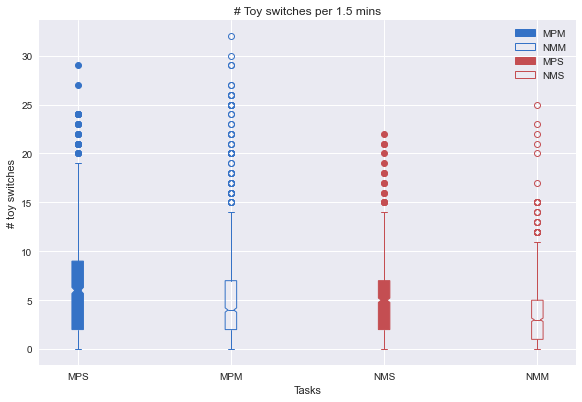

In [188]:
fig, ax = plt.subplots()

mpm_list = list(itertools.chain.from_iterable(switches_mpm))
nmm_list = list(itertools.chain.from_iterable(switches_nmm))
mps_list = list(itertools.chain.from_iterable(switches_mps))
nms_list = list(itertools.chain.from_iterable(switches_nms))

mpm0 = ax.boxplot(mpm_list, positions= [0], notch=True, patch_artist=True,
                    boxprops=dict(color='b', facecolor= 'b'),
                    capprops=dict(color='b'),
                    whiskerprops=dict(color='b'),
                    flierprops=dict(color='b', markeredgecolor='b',fillstyle='full',marker='o',markerfacecolor='b'),
                    medianprops=dict(color='b'))

nmm0 = ax.boxplot(nmm_list, positions= [2], notch=True, patch_artist=True,
            boxprops=dict(color='b', facecolor='none'),
            capprops=dict(color='b'),
            whiskerprops=dict(color='b'),
            flierprops=dict(color='b', markeredgecolor='b'),
            medianprops=dict(color='b'),) 

mps0 = ax.boxplot(mps_list, positions= [4], notch=True, patch_artist=True,
            boxprops=dict( color='r',facecolor='r'),
            capprops=dict(color='r'),
            whiskerprops=dict(color='r'),
            flierprops=dict(color='r', fillstyle='full', markeredgecolor='r',marker='o',markerfacecolor='r'),
            medianprops=dict(color='r'),)

nms0 = ax.boxplot(nms_list, positions= [6], notch=True, patch_artist=True,
            
            boxprops=dict(color='r', facecolor='none',),
            capprops=dict(color='r'),
            whiskerprops=dict(color='r'),
            flierprops=dict(color='r', markeredgecolor='r'),
            medianprops=dict(color='r'),)


ax.set_xticks([0,2,4,6])
ax.set_xticklabels(tasks)
ax.set_title("# Toy switches per 1.5 mins")
plt.tight_layout()
plt.xlabel('Tasks')
plt.ylabel('# toy switches')
ax.legend([mpm0["boxes"][0], nmm0["boxes"][0], mps0["boxes"][0], nms0['boxes'][0]], ['MPM', 'NMM', 'MPS', 'NMS'], loc='upper right')

plt.show()

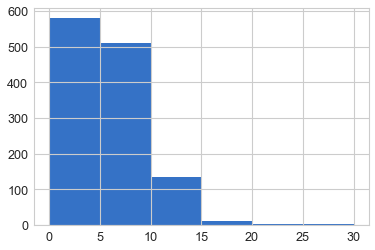

In [49]:

bins = [0, 5, 10, 15, 20, 30]
fig = plt.hist(list(itertools.chain.from_iterable(switches_mps)), bins = bins, stacked = True)

plt.show()

(array([505., 495., 175.,  38.,  26.]),
 array([ 0,  5, 10, 15, 20, 30]),
 <BarContainer object of 5 artists>)

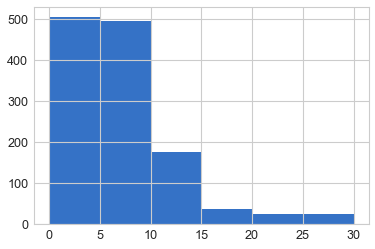

In [50]:
bins = [0, 5, 10, 15, 20, 30]

plt.hist(list(itertools.chain.from_iterable(switches_mpm)), bins = bins)


(array([691., 397., 128.,  25.,  35.]),
 array([ 0,  5, 10, 15, 20, 30]),
 <BarContainer object of 5 artists>)

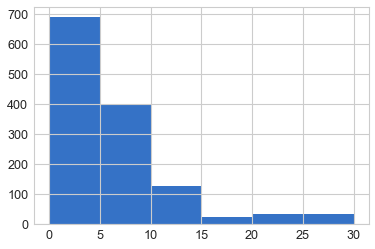

In [52]:
bins = [0, 5, 10, 15, 20, 30]
plt.hist(list(itertools.chain.from_iterable(switches_nmm)), bins = bins)


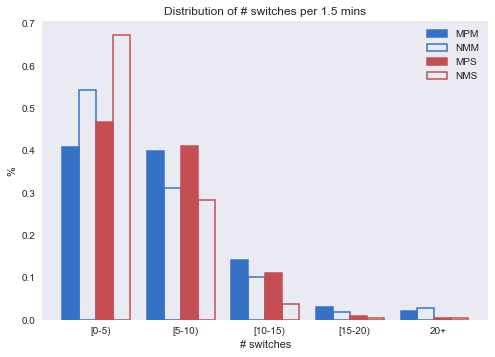

In [104]:
plt.style.use('seaborn')
cnt_mps, val_mps = np.histogram(list(itertools.chain.from_iterable(switches_mps)), bins= bins)
cnt_mpm, val_mpm = np.histogram(list(itertools.chain.from_iterable(switches_mpm)), bins= bins)
cnt_nms, val_nms = np.histogram(list(itertools.chain.from_iterable(switches_nms)), bins= bins)
cnt_nmm, val_nmm = np.histogram(list(itertools.chain.from_iterable(switches_nmm)), bins= bins)

cnt_mps = cnt_mps/cnt_mps.sum()
cnt_mpm = cnt_mpm/cnt_mpm.sum()
cnt_nms = cnt_nms/cnt_nms.sum()
cnt_nmm = cnt_nmm/cnt_nmm.sum()

plt.bar(val_mpm[:-1], cnt_mpm, label = "MPM", width = 1, color = 'b', edgecolor='b', linewidth=1.5)
plt.bar(val_nmm[:-1]+1, cnt_nmm, label = 'NMM', width = 1, color = None, edgecolor='b',fill = None, linewidth=1.5)
plt.bar(val_mps[:-1]+2, cnt_mps, label = "MPS", width = 1, color = 'r', edgecolor='r', linewidth=1.5)
plt.bar(val_nms[:-1]+3, cnt_nms, label = 'NMS', width = 1, color = None, edgecolor='r',fill = None, linewidth=1.5)


plt.xticks(np.array([0,5,10,15,20])+1.75,["[0-5)", "[5-10)", '[10-15)', '[15-20)', '20+'])
plt.grid(False)
plt.legend()
plt.title('Distribution of # switches per 1.5 mins')
plt.xlabel('# switches')
plt.ylabel('%')

plt.title('Distribution of # switches per 1.5 mins')

plt.show()

### plot by time

In [120]:
task = "MPS"
feature_list = task_based_feature[task]

x_s_mps = []
y_s_mps = []
for _ in range(6):
   x_s_mps.append([])
   y_s_mps.append([]) 

for feature in feature_list:
    for i in range(len(feature)):
        x_s_mps[i].append(i)
        y_s_mps[i].append(feature[i][0])

task = "MPM"
feature_list = task_based_feature[task]

x_s_mpm = []
y_s_mpm = []
for _ in range(6):
   x_s_mpm.append([])
   y_s_mpm.append([]) 

for feature in feature_list:
    if len(feature) < 14:
        for i in range(len(feature)):
            x_s_mpm[i].append(i)
            y_s_mpm[i].append(feature[i][0])

task = "NMM"
feature_list = task_based_feature[task]

x_s_nmm = []
y_s_nmm = []
for _ in range(6):
   x_s_nmm.append([])
   y_s_nmm.append([]) 

for feature in feature_list:
    for i in range(len(feature)):
        if i <= 5:
            x_s_nmm[i].append(i)
            y_s_nmm[i].append(feature[i][0])

task = "NMS"
feature_list = task_based_feature[task]

x_s_nms = []
y_s_nms = []
for _ in range(6):
   x_s_nms.append([])
   y_s_nms.append([]) 

for feature in feature_list:
        for i in range(len(feature)):
            if i <= 5:
                x_s_nms[i].append(i)
                y_s_nms[i].append(feature[i][0])

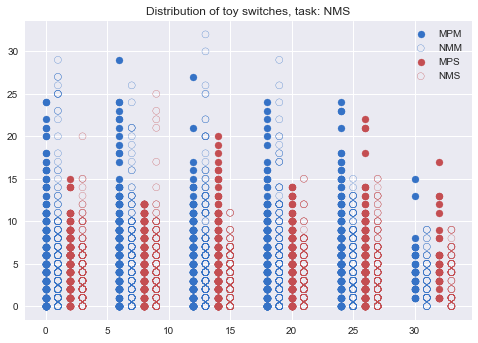

In [140]:
fig, ax = plt.subplots()
for i in range(6):
    if i == 0:
        ax.boxplot([i*6]*len(y_s_mpm[i]),  y_s_mpm[i], facecolors='b',edgecolors='b', label = "MPM")
        ax.boxplot([i*6 + 1]*len(y_s_nmm[i]), y_s_nmm[i], facecolors='none',edgecolors='b', label = "NMM") 
        ax.boxplot([i*6 + 2]*len(y_s_mps[i]) , y_s_mps[i], facecolors='r', edgecolors='r', label = "MPS")
        ax.boxplot([i*6 + 3]*len(y_s_nms[i]), y_s_nms[i], facecolors='none', edgecolors='r', label = "NMS")
    else:
        ax.boxplot([i*6]*len(y_s_mpm[i]),  y_s_mpm[i], facecolors='b',edgecolors='b')
        ax.boxplot([i*6 + 1]*len(y_s_nmm[i]), y_s_nmm[i], facecolors='none',edgecolors='b') 
        ax.boxplot([i*6 + 2]*len(y_s_mps[i]) , y_s_mps[i], facecolors='r', edgecolors='r')
        ax.boxplot([i*6 + 3]*len(y_s_nms[i]), y_s_nms[i], facecolors='none', edgecolors='r')


ax.set_title("Distribution of toy switches, task: "+ task)

plt.legend()
plt.show()

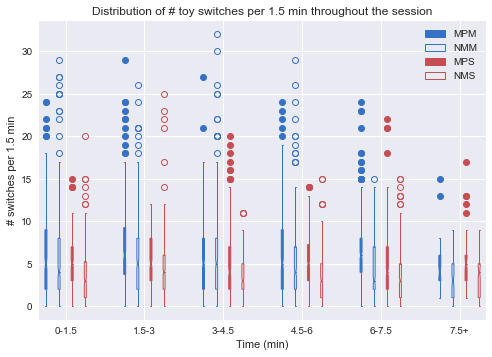

In [189]:
fig, ax = plt.subplots()
for i in range(6):
    if i == 0:
        mpm0 = ax.boxplot(y_s_mpm[i],positions= [i*6], notch=True, patch_artist=True, 
                    boxprops=dict(color='b', facecolor= 'b'),
                    capprops=dict(color='b'),
                    whiskerprops=dict(color='b'),
                    flierprops=dict(color='b', markeredgecolor='b',fillstyle='full',markerfacecolor='b'),
                    medianprops=dict(color='b'))

        nmm0 = ax.boxplot(y_s_nmm[i], positions= [i*6 +1], notch=True, patch_artist=True,
                    boxprops=dict(color='b', facecolor='none'),
                    capprops=dict(color='b'),
                    whiskerprops=dict(color='b'),
                    flierprops=dict(color='b', markeredgecolor='b'),
                    medianprops=dict(color='b'),) 

        mps0 = ax.boxplot(y_s_mps[i], positions= [i*6 +2], notch=True, patch_artist=True,
                    boxprops=dict( color='r',facecolor='r'),
                    capprops=dict(color='r'),
                    whiskerprops=dict(color='r'),
                    flierprops=dict(color='r', fillstyle='full', markeredgecolor='r',markerfacecolor='r'),
                    medianprops=dict(color='r'),)

        nms0 = ax.boxplot(y_s_nms[i], positions= [i*6 +3], notch=True, patch_artist=True, 
                    boxprops=dict(color='r', facecolor='none',),
                    capprops=dict(color='r'),
                    whiskerprops=dict(color='r'),
                    flierprops=dict(color='r', markeredgecolor='r'),
                    medianprops=dict(color='r'),)
    else:
        ax.boxplot(y_s_mpm[i],positions= [i*6], notch=True, patch_artist=True,
                    boxprops=dict(color='b', facecolor= 'b'),
                    capprops=dict(color='b'),
                    whiskerprops=dict(color='b'),
                    flierprops=dict(color='b', markeredgecolor='b',fillstyle='full',markerfacecolor='b'),
                    medianprops=dict(color='b'))

        ax.boxplot(y_s_nmm[i], positions= [i*6 +1], notch=True, patch_artist=True,
                    boxprops=dict(color='b', facecolor='none'),
                    capprops=dict(color='b'),
                    whiskerprops=dict(color='b'),
                    flierprops=dict(color='b', markeredgecolor='b'),
                    medianprops=dict(color='b'),) 

        ax.boxplot(y_s_mps[i], positions= [i*6 +2], notch=True, patch_artist=True,
                    boxprops=dict( color='r',facecolor='r'),
                    capprops=dict(color='r'),
                    whiskerprops=dict(color='r'),
                    flierprops=dict(color='r', fillstyle='full', markeredgecolor='r', markerfacecolor='r'),
                    medianprops=dict(color='r'),)

        ax.boxplot(y_s_nms[i], positions= [i*6 +3], notch=True, patch_artist=True,
                    
                    boxprops=dict(color='r', facecolor='none',),
                    capprops=dict(color='r'),
                    whiskerprops=dict(color='r'),
                    flierprops=dict(color='r', markeredgecolor='r'),
                    medianprops=dict(color='r'),)


ax.set_title("Distribution of # toy switches per 1.5 min throughout the session")
ax.legend([mpm0["boxes"][0], nmm0["boxes"][0], mps0["boxes"][0], nms0['boxes'][0]], ['MPM', 'NMM', 'MPS', 'NMS'], loc='upper right')
ax.set_xticks([1.5, 7.5, 13.5, 19.5, 25.5, 31.5])
ax.set_xticklabels(["0-1.5", "1.5-3", "3-4.5", "4.5-6", "6-7.5", "7.5+"])
ax.set_xlabel("Time (min)")
ax.set_ylabel("# switches per 1.5 min")


plt.show()

(array([890., 374.,  48.,   7.,   5.]),
 array([ 0,  5, 10, 15, 20, 30]),
 <BarContainer object of 5 artists>)

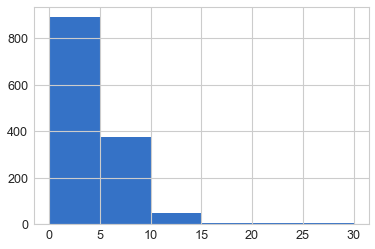

In [53]:
bins = [0, 5, 10, 15, 20, 30]
np.histogram
plt.hist(list(itertools.chain.from_iterable(switches_nms)), bins = bins)


Text(0.5, 1.0, 'Distribution of toy switches, task: MPS')

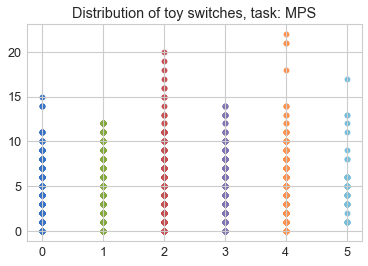

In [9]:
# feature_list = convert_to_list_seqs(input_list_1_5, len_list_1_5)
task = "MPS"
feature_list = task_based_feature[task]
fig, ax = plt.subplots()

x_s = []
y_s = []
for _ in range(6):
   x_s.append([])
   y_s.append([]) 

for feature in feature_list:
    for i in range(len(feature)):
        x_s[i].append(i)
        y_s[i].append(feature[i][0])

for i in range(6):
    ax.scatter(x_s[i], y_s[i])
ax.set_title("Distribution of toy switches, task: "+ task)


In [ ]:
plt.violinplot()

In [107]:
# feature_list = convert_to_list_seqs(input_list_1_5, len_list_1_5)
task = "MPM"
feature_list = task_based_feature[task]
# fig, ax = plt.subplots()

x_s_mpm = []
y_s_mpm = []
for _ in range(6):
   x_s_mpm.append([])
   y_s_mpm.append([]) 

for feature in feature_list:
    if len(feature) < 14:
        for i in range(len(feature)):
            x_s_mpm[i].append(i)
            y_s_mpm[i].append(feature[i][0])

# for i in range(6):
#     ax.scatter(x_s[i], y_s[i])
# ax.set_title("Distribution of toy switches, task: "+ task)
    

Text(0.5, 1.0, 'Distribution of toy switches, task: NMM')

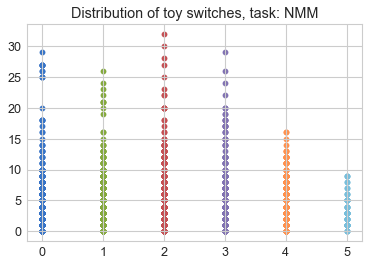

In [49]:
# feature_list = convert_to_list_seqs(input_list_1_5, len_list_1_5)
task = "NMM"
feature_list = task_based_feature[task]
fig, ax = plt.subplots()

x_s = []
y_s = []
for _ in range(7):
   x_s.append([])
   y_s.append([]) 

for feature in feature_list:
    for i in range(len(feature)):
        x_s[i].append(i)
        y_s[i].append(feature[i][0])

for i in range(6):
    ax.scatter(x_s[i], y_s[i])
ax.set_title("Distribution of toy switches, task: "+ task)


14


Text(0.5, 1.0, 'Distribution of toy switches, task: NMS')

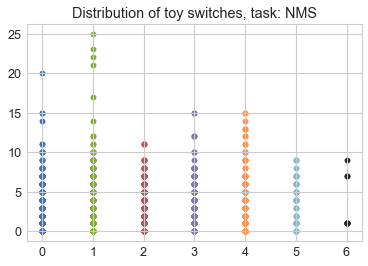

In [48]:
# feature_list = convert_to_list_seqs(input_list_1_5, len_list_1_5)
task = "NMS"
feature_list = task_based_feature[task]
fig, ax = plt.subplots()

x_s = []
y_s = []
for _ in range(8):
   x_s.append([])
   y_s.append([]) 

print(max([len(f) for f in feature_list]))

for feature in feature_list:
    if len(feature) < 14:
        for i in range(len(feature)):
            x_s[i].append(i)
            y_s[i].append(feature[i][0])

for i in range(8):
    ax.scatter(x_s[i], y_s[i])
ax.set_title("Distribution of toy switches, task: "+ task)


In [7]:
i = 0
for task in tasks:
    for subj, shifted_df_dict in feature_dict_1_5[task].items():
        for shift_time, feature_vector in shifted_df_dict.items():
            if (feature_vector[:,0] >= 25).any():
                print(subj, task, shift_time, feature_vector[:,0])
                # print(subj, task, shift_time)

17 MPM 0.0 [12.  7. 14. 26. 19. 11.]
17 MPM 0.5 [11.  7. 16. 24. 25.]
17 MPM 0.75 [10.  9. 17. 26. 20.]
17 MPM 1.25 [ 8. 13. 29. 17. 13.]
25 MPM 0.75 [ 8. 30.  5. 10.  3.]
28 MPM 0.0 [13. 14. 14. 34. 31.]
28 MPM 0.25 [16. 10. 24. 28. 27.]
28 MPM 0.5 [21.  5. 29. 31. 21.]
28 MPM 0.75 [22.  3. 37. 31. 19.]
28 MPM 1.0 [24.  5. 39. 29. 15.]
28 MPM 1.25 [21.  7. 41. 31.  9.]
33 MPM 1.25 [ 5. 27.  9.  1.  7.]
37 NMS 0.5 [ 7. 25.  5.  5. 13.]
30 NMM 0.0 [ 7. 24. 20. 29.  6.]
30 NMM 0.25 [ 6. 26. 20. 26.  9.]
30 NMM 0.75 [20. 13. 30. 18. 12.]
30 NMM 1.0 [25. 12. 25. 19. 11.]
30 NMM 1.25 [25. 14. 32.  9. 11.]
36 NMM 0.25 [29.  9.  6.  4.  2.  3.]
36 NMM 0.5 [27.  7.  6.  4.  2.  3.]
36 NMM 0.75 [25. 13.  1.  3.  2.]
36 NMM 1.0 [26.  9.  1.  3.  3.]
36 NMM 1.25 [27.  6.  3.  2.  3.]
8 NMM 0.0 [27.  7. 18. 17.  9.  8.]
8 NMM 0.25 [27.  5. 22. 12. 12.]
8 NMM 0.5 [27.  3. 27.  9. 12.]
8 NMM 0.75 [26.  3. 28.  7. 13.]


(array([2.427e+03, 1.537e+03, 6.160e+02, 1.800e+02, 7.200e+01, 5.100e+01,
        2.200e+01, 1.200e+01, 1.000e+00, 3.000e+00]),
 array([ 0. ,  4.1,  8.2, 12.3, 16.4, 20.5, 24.6, 28.7, 32.8, 36.9, 41. ]),
 <BarContainer object of 10 artists>)

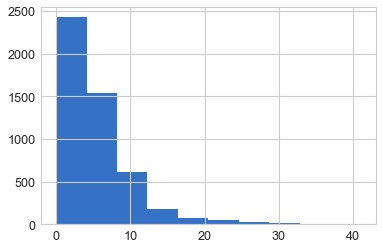

In [8]:
plt.hist(input_list_1_5[:,0])

In [ ]:
def draw_infant_each_min_matplotlib(focus_cnt: list, explore_cnt: list, no_ops_state: list):
    x = np.arange(17)
    tickvals = [x for x in range(17) if x % 2 ==0]
    ticktext = [str(int(x/2)) for x in tickvals]
    x_labels = []
    fig, ax = plt.subplots()#figure(figsize=(6,4))
    explore_plot, = ax.plot(x, explore_cnt[:17], marker = 'v', color = 'green', label = 'Explore states: E, E+')
    focus_plot, = ax.plot(x, focus_cnt[:17], marker = 'o', color = 'orange', label = 'Focus states: F, F+')
    no_ops_plot, = ax.plot(x, no_ops_state[:17], marker = 'h', color = 'blue', label = 'No_ops')


    ax.legend(handles=[explore_plot, focus_plot, no_ops_plot], bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xlabel('Minutes')
    ax.set_ylabel('Number of infant')
    # ax.set_yticks(np.arange(0, 20, 2))
    ax.set_xticks(np.arange(0, 17, 2))

    ax.set_xticklabels([str(x) for x in np.arange(0,len(ticktext),1)])

    [l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % 2 != 0]

    plt.show()

## 1 min

In [192]:
with open('../data/interim/20210718_feature_engineering_1_min.pickle', 'rb') as f:
    feature_dict_1_min = pickle.load(f)

with open('../data/interim/20210718_label_1_min.pickle', 'rb') as f:
    labels_dict_1_min = pickle.load(f)

In [197]:
input_list_1 = np.empty((0, n_features))
task_based_feature_1_min = {}
task_based_len_1_min = {}
len_list_1 = []

for task in tasks:
    task_based_feature_1_min[task] = []
    task_based_len_1_min[task] = []
    for subj, shifted_df_dict in feature_dict_1_min[task].items():
        for shift_time, feature_vector in shifted_df_dict.items():
            # print(feature_vector)
            input_list_1 = np.vstack((input_list_1, feature_vector))
            len_list_1.append(len(feature_vector))
            task_based_feature_1_min[task].append(feature_vector)
            task_based_len_1_min[task].append(len(feature_vector)) 

switches_mps_1_min = [i[:,0].tolist() for i in task_based_feature_1_min['MPS']]
switches_mpm_1_min = [i[:,0] for i in task_based_feature_1_min['MPM']]
switches_nms_1_min = [i[:,0] for i in task_based_feature_1_min['NMS']]
switches_nmm_1_min = [i[:,0] for i in task_based_feature_1_min['NMM']]

(array([2511., 1226., 1046.,  243.,   93.,   68.,   15.,   20.,   11.,
           8.]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <BarContainer object of 10 artists>)

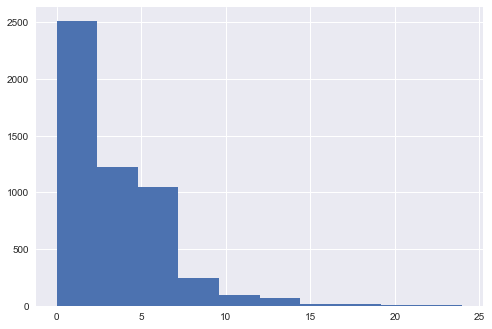

In [198]:
plt.hist(input_list_1[:,0])

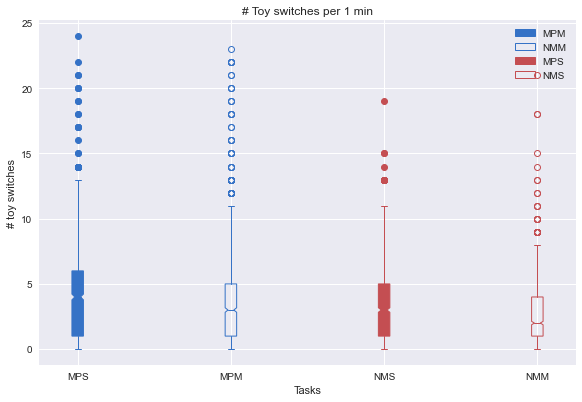

In [199]:
fig, ax = plt.subplots()

mpm_list_1_min = list(itertools.chain.from_iterable(switches_mpm_1_min))
nmm_list_1_min = list(itertools.chain.from_iterable(switches_nmm_1_min))
mps_list_1_min = list(itertools.chain.from_iterable(switches_mps_1_min))
nms_list_1_min = list(itertools.chain.from_iterable(switches_nms_1_min))

mpm0_1_min = ax.boxplot(mpm_list_1_min, positions= [0], notch=True, patch_artist=True,
                    boxprops=dict(color='b', facecolor= 'b'),
                    capprops=dict(color='b'),
                    whiskerprops=dict(color='b'),
                    flierprops=dict(color='b', markeredgecolor='b',fillstyle='full',marker='o',markerfacecolor='b'),
                    medianprops=dict(color='b'))

nmm0_1_min = ax.boxplot(nmm_list_1_min, positions= [2], notch=True, patch_artist=True,
            boxprops=dict(color='b', facecolor='none'),
            capprops=dict(color='b'),
            whiskerprops=dict(color='b'),
            flierprops=dict(color='b', markeredgecolor='b'),
            medianprops=dict(color='b'),) 

mps0_1_min = ax.boxplot(mps_list_1_min, positions= [4], notch=True, patch_artist=True,
            boxprops=dict( color='r',facecolor='r'),
            capprops=dict(color='r'),
            whiskerprops=dict(color='r'),
            flierprops=dict(color='r', fillstyle='full', markeredgecolor='r',marker='o',markerfacecolor='r'),
            medianprops=dict(color='r'),)

nms0_1_min = ax.boxplot(nms_list_1_min, positions= [6], notch=True, patch_artist=True,
            
            boxprops=dict(color='r', facecolor='none',),
            capprops=dict(color='r'),
            whiskerprops=dict(color='r'),
            flierprops=dict(color='r', markeredgecolor='r'),
            medianprops=dict(color='r'),)


ax.set_xticks([0,2,4,6])
ax.set_xticklabels(tasks)
ax.set_title("# Toy switches per 1 min")
plt.tight_layout()
plt.xlabel('Tasks')
plt.ylabel('# toy switches')
ax.legend([mpm0_1_min["boxes"][0], nmm0_1_min["boxes"][0], mps0_1_min["boxes"][0], nms0_1_min['boxes'][0]], ['MPM', 'NMM', 'MPS', 'NMS'], loc='upper right')

plt.show()

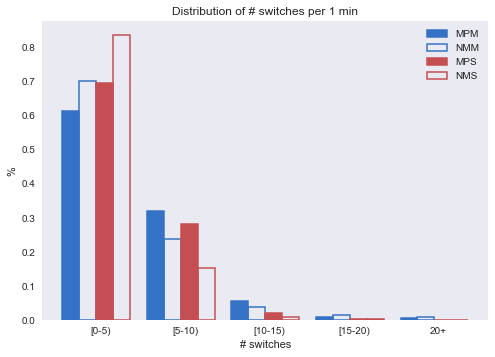

In [200]:
plt.style.use('seaborn')
cnt_mps_1_min, val_mps_1_min = np.histogram(list(itertools.chain.from_iterable(switches_mps_1_min)), bins= bins)
cnt_mpm_1_min, val_mpm_1_min = np.histogram(list(itertools.chain.from_iterable(switches_mpm_1_min)), bins= bins)
cnt_nms_1_min, val_nms_1_min = np.histogram(list(itertools.chain.from_iterable(switches_nms_1_min)), bins= bins)
cnt_nmm_1_min, val_nmm_1_min = np.histogram(list(itertools.chain.from_iterable(switches_nmm_1_min)), bins= bins)

cnt_mps_1_min = cnt_mps_1_min/cnt_mps_1_min.sum()
cnt_mpm_1_min = cnt_mpm_1_min/cnt_mpm_1_min.sum()
cnt_nms_1_min = cnt_nms_1_min/cnt_nms_1_min.sum()
cnt_nmm_1_min = cnt_nmm_1_min/cnt_nmm_1_min.sum()

plt.bar(val_mpm_1_min[:-1], cnt_mpm_1_min, label = "MPM", width = 1, color = 'b', edgecolor='b', linewidth=1.5)
plt.bar(val_nmm_1_min[:-1]+1, cnt_nmm_1_min, label = 'NMM', width = 1, color = None, edgecolor='b',fill = None, linewidth=1.5)
plt.bar(val_mps_1_min[:-1]+2, cnt_mps_1_min, label = "MPS", width = 1, color = 'r', edgecolor='r', linewidth=1.5)
plt.bar(val_nms_1_min[:-1]+3, cnt_nms_1_min, label = 'NMS', width = 1, color = None, edgecolor='r',fill = None, linewidth=1.5)


plt.xticks(np.array([0,5,10,15,20])+1.75,["[0-5)", "[5-10)", '[10-15)', '[15-20)', '20+'])
plt.grid(False)
plt.legend()
plt.title('Distribution of # switches per 1 min')
plt.xlabel('# switches')
plt.ylabel('%')

plt.show()

In [202]:
task = "MPS"
feature_list_1_min = task_based_feature_1_min[task]

x_s_mps_1_min = []
y_s_mps_1_min = []
for _ in range(8):
   x_s_mps_1_min.append([])
   y_s_mps_1_min.append([]) 

for feature in feature_list_1_min:
    for i in range(len(feature)):
        if i <= 7:
            x_s_mps_1_min[i].append(i)
            y_s_mps_1_min[i].append(feature[i][0])

task = "MPM"
feature_list_1_min = task_based_feature_1_min[task]

x_s_mpm_1_min = []
y_s_mpm_1_min = []
for _ in range(8):
   x_s_mpm_1_min.append([])
   y_s_mpm_1_min.append([]) 

for feature in feature_list_1_min:
    for i in range(len(feature)):
        if i <= 7:
            x_s_mpm_1_min[i].append(i)
            y_s_mpm_1_min[i].append(feature[i][0])

task = "NMM"
feature_list_1_min = task_based_feature_1_min[task]

x_s_nmm_1_min = []
y_s_nmm_1_min = []
for _ in range(8):
   x_s_nmm_1_min.append([])
   y_s_nmm_1_min.append([]) 

for feature in feature_list_1_min:
    for i in range(len(feature)):
        if i <= 7:
            x_s_nmm_1_min[i].append(i)
            y_s_nmm_1_min[i].append(feature[i][0])

task = "NMS"
feature_list_1_min = task_based_feature_1_min[task]

x_s_nms_1_min = []
y_s_nms_1_min = []
for _ in range(8):
   x_s_nms_1_min.append([])
   y_s_nms_1_min.append([]) 

for feature in feature_list_1_min:
        for i in range(len(feature)):
            if i <= 7:
                x_s_nms_1_min[i].append(i)
                y_s_nms_1_min[i].append(feature[i][0])

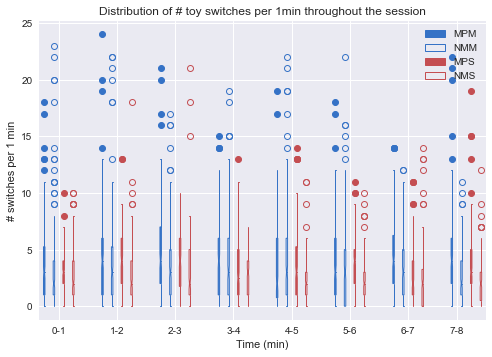

In [205]:
fig, ax = plt.subplots()
for i in range(8):
    if i == 0:
        mpm0 = ax.boxplot(y_s_mpm_1_min[i],positions= [i*6], notch=True, patch_artist=True, 
                    boxprops=dict(color='b', facecolor= 'b'),
                    capprops=dict(color='b'),
                    whiskerprops=dict(color='b'),
                    flierprops=dict(color='b', markeredgecolor='b',fillstyle='full',markerfacecolor='b'),
                    medianprops=dict(color='b'))

        nmm0 = ax.boxplot(y_s_nmm_1_min[i], positions= [i*6 +1], notch=True, patch_artist=True,
                    boxprops=dict(color='b', facecolor='none'),
                    capprops=dict(color='b'),
                    whiskerprops=dict(color='b'),
                    flierprops=dict(color='b', markeredgecolor='b'),
                    medianprops=dict(color='b'),) 

        mps0 = ax.boxplot(y_s_mps_1_min[i], positions= [i*6 +2], notch=True, patch_artist=True,
                    boxprops=dict( color='r',facecolor='r'),
                    capprops=dict(color='r'),
                    whiskerprops=dict(color='r'),
                    flierprops=dict(color='r', fillstyle='full', markeredgecolor='r',markerfacecolor='r'),
                    medianprops=dict(color='r'),)

        nms0 = ax.boxplot(y_s_nms_1_min[i], positions= [i*6 +3], notch=True, patch_artist=True, 
                    boxprops=dict(color='r', facecolor='none',),
                    capprops=dict(color='r'),
                    whiskerprops=dict(color='r'),
                    flierprops=dict(color='r', markeredgecolor='r'),
                    medianprops=dict(color='r'),)
    else:
        ax.boxplot(y_s_mpm_1_min[i],positions= [i*6], notch=True, patch_artist=True,
                    boxprops=dict(color='b', facecolor= 'b'),
                    capprops=dict(color='b'),
                    whiskerprops=dict(color='b'),
                    flierprops=dict(color='b', markeredgecolor='b',fillstyle='full',markerfacecolor='b'),
                    medianprops=dict(color='b'))

        ax.boxplot(y_s_nmm_1_min[i], positions= [i*6 +1], notch=True, patch_artist=True,
                    boxprops=dict(color='b', facecolor='none'),
                    capprops=dict(color='b'),
                    whiskerprops=dict(color='b'),
                    flierprops=dict(color='b', markeredgecolor='b'),
                    medianprops=dict(color='b'),) 

        ax.boxplot(y_s_mps_1_min[i], positions= [i*6 +2], notch=True, patch_artist=True,
                    boxprops=dict( color='r',facecolor='r'),
                    capprops=dict(color='r'),
                    whiskerprops=dict(color='r'),
                    flierprops=dict(color='r', fillstyle='full', markeredgecolor='r', markerfacecolor='r'),
                    medianprops=dict(color='r'),)

        ax.boxplot(y_s_nms_1_min[i], positions= [i*6 +3], notch=True, patch_artist=True,
                    
                    boxprops=dict(color='r', facecolor='none',),
                    capprops=dict(color='r'),
                    whiskerprops=dict(color='r'),
                    flierprops=dict(color='r', markeredgecolor='r'),
                    medianprops=dict(color='r'),)


ax.set_title("Distribution of # toy switches per 1min throughout the session")
ax.legend([mpm0["boxes"][0], nmm0["boxes"][0], mps0["boxes"][0], nms0['boxes'][0]], ['MPM', 'NMM', 'MPS', 'NMS'], loc='upper right')
ax.set_xticks([1.5, 7.5, 13.5, 19.5, 25.5, 31.5, 37.5, 42.5])
ax.set_xticklabels(["0-1", "1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8"])
ax.set_xlabel("Time (min)")
ax.set_ylabel("# switches per 1 min")


plt.show()

## 2 min

In [207]:
with open('../data/interim/20210718_feature_engineering_2_min.pickle', 'rb') as f:
    feature_dict_2_min = pickle.load(f)

with open('../data/interim/20210718_label_2_min.pickle', 'rb') as f:
    labels_dict_2_min = pickle.load(f)

In [208]:
input_list_2 = np.empty((0, n_features))
task_based_feature_2_min = {}
task_based_len_2_min= {}
len_list_2 = []

for task in tasks:
    task_based_feature_2_min[task] = []
    task_based_len_2_min[task] = []
    for subj, shifted_df_dict in feature_dict_2_min[task].items():
        for shift_time, feature_vector in shifted_df_dict.items():
            # print(feature_vector)
            input_list_2 = np.vstack((input_list_2, feature_vector))
            len_list_2.append(len(feature_vector))
            task_based_feature_2_min[task].append(feature_vector)
            task_based_len_2_min[task].append(len(feature_vector)) 

switches_mps_2_min = [i[:,0].tolist() for i in task_based_feature_2_min['MPS']]
switches_mpm_2_min = [i[:,0] for i in task_based_feature_2_min['MPM']]
switches_nms_2_min = [i[:,0] for i in task_based_feature_2_min['NMS']]
switches_nmm_2_min = [i[:,0] for i in task_based_feature_2_min['NMM']]

(array([1572., 1534., 1092.,  460.,  136.,   53.,   46.,   21.,    4.,
           3.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40.]),
 <BarContainer object of 10 artists>)

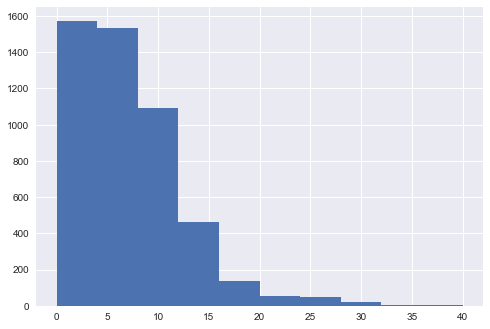

In [209]:
plt.hist(input_list_2[:,0])


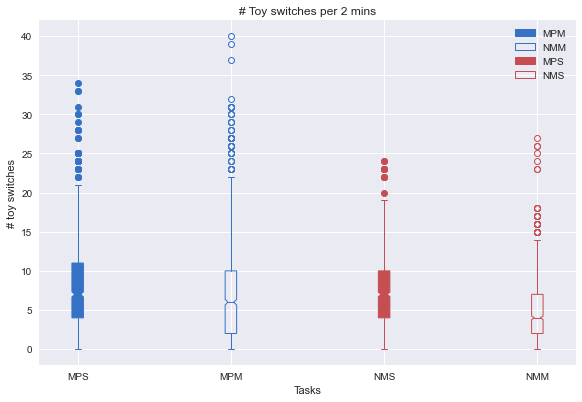

In [210]:
fig, ax = plt.subplots()

mpm_list_2_min = list(itertools.chain.from_iterable(switches_mpm_2_min))
nmm_list_2_min = list(itertools.chain.from_iterable(switches_nmm_2_min))
mps_list_2_min = list(itertools.chain.from_iterable(switches_mps_2_min))
nms_list_2_min = list(itertools.chain.from_iterable(switches_nms_2_min))

mpm0_2_min = ax.boxplot(mpm_list_2_min, positions= [0], notch=True, patch_artist=True,
                    boxprops=dict(color='b', facecolor= 'b'),
                    capprops=dict(color='b'),
                    whiskerprops=dict(color='b'),
                    flierprops=dict(color='b', markeredgecolor='b',fillstyle='full',marker='o',markerfacecolor='b'),
                    medianprops=dict(color='b'))

nmm0_2_min = ax.boxplot(nmm_list_2_min, positions= [2], notch=True, patch_artist=True,
            boxprops=dict(color='b', facecolor='none'),
            capprops=dict(color='b'),
            whiskerprops=dict(color='b'),
            flierprops=dict(color='b', markeredgecolor='b'),
            medianprops=dict(color='b'),) 

mps0_2_min = ax.boxplot(mps_list_2_min, positions= [4], notch=True, patch_artist=True,
            boxprops=dict( color='r',facecolor='r'),
            capprops=dict(color='r'),
            whiskerprops=dict(color='r'),
            flierprops=dict(color='r', fillstyle='full', markeredgecolor='r',marker='o',markerfacecolor='r'),
            medianprops=dict(color='r'),)

nms0_2_min = ax.boxplot(nms_list_2_min, positions= [6], notch=True, patch_artist=True,
            
            boxprops=dict(color='r', facecolor='none',),
            capprops=dict(color='r'),
            whiskerprops=dict(color='r'),
            flierprops=dict(color='r', markeredgecolor='r'),
            medianprops=dict(color='r'),)


ax.set_xticks([0,2,4,6])
ax.set_xticklabels(tasks)
ax.set_title("# Toy switches per 2 mins")
plt.tight_layout()
plt.xlabel('Tasks')
plt.ylabel('# toy switches')
ax.legend([mpm0_2_min["boxes"][0], nmm0_2_min["boxes"][0], mps0_2_min["boxes"][0], nms0_2_min['boxes'][0]], ['MPM', 'NMM', 'MPS', 'NMS'], loc='upper right')

plt.show()

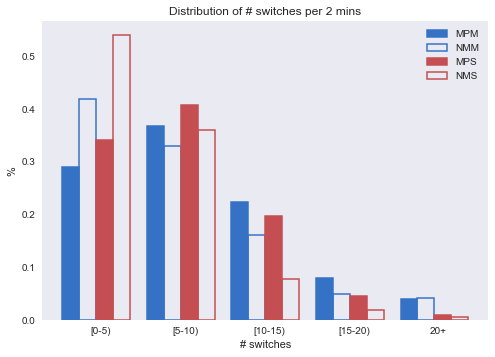

In [211]:
plt.style.use('seaborn')
cnt_mps_2_min, val_mps_2_min = np.histogram(list(itertools.chain.from_iterable(switches_mps_2_min)), bins= bins)
cnt_mpm_2_min, val_mpm_2_min = np.histogram(list(itertools.chain.from_iterable(switches_mpm_2_min)), bins= bins)
cnt_nms_2_min, val_nms_2_min = np.histogram(list(itertools.chain.from_iterable(switches_nms_2_min)), bins= bins)
cnt_nmm_2_min, val_nmm_2_min = np.histogram(list(itertools.chain.from_iterable(switches_nmm_2_min)), bins= bins)

cnt_mps_2_min = cnt_mps_2_min/cnt_mps_2_min.sum()
cnt_mpm_2_min = cnt_mpm_2_min/cnt_mpm_2_min.sum()
cnt_nms_2_min = cnt_nms_2_min/cnt_nms_2_min.sum()
cnt_nmm_2_min = cnt_nmm_2_min/cnt_nmm_2_min.sum()

plt.bar(val_mpm_2_min[:-1], cnt_mpm_2_min, label = "MPM", width = 1, color = 'b', edgecolor='b', linewidth=1.5)
plt.bar(val_nmm_2_min[:-1]+1, cnt_nmm_2_min, label = 'NMM', width = 1, color = None, edgecolor='b',fill = None, linewidth=1.5)
plt.bar(val_mps_2_min[:-1]+2, cnt_mps_2_min, label = "MPS", width = 1, color = 'r', edgecolor='r', linewidth=1.5)
plt.bar(val_nms_2_min[:-1]+3, cnt_nms_2_min, label = 'NMS', width = 1, color = None, edgecolor='r',fill = None, linewidth=1.5)


plt.xticks(np.array([0,5,10,15,20])+1.75,["[0-5)", "[5-10)", '[10-15)', '[15-20)', '20+'])
plt.grid(False)
plt.legend()
plt.title('Distribution of # switches per 2 mins')
plt.xlabel('# switches')
plt.ylabel('%')

plt.show()

In [214]:
task = "MPS"
feature_list_2_min = task_based_feature_2_min[task]

x_s_mps_2_min = []
y_s_mps_2_min = []
for _ in range(4):
   x_s_mps_2_min.append([])
   y_s_mps_2_min.append([]) 

for feature in feature_list_2_min:
    for i in range(len(feature)):
        if i <= 3:
            x_s_mps_2_min[i].append(i)
            y_s_mps_2_min[i].append(feature[i][0])

task = "MPM"
feature_list_2_min = task_based_feature_2_min[task]

x_s_mpm_2_min = []
y_s_mpm_2_min = []
for _ in range(4):
   x_s_mpm_2_min.append([])
   y_s_mpm_2_min.append([]) 

for feature in feature_list_2_min:
    for i in range(len(feature)):
        if i <= 3:
            x_s_mpm_2_min[i].append(i)
            y_s_mpm_2_min[i].append(feature[i][0])

task = "NMM"
feature_list_2_min = task_based_feature_2_min[task]

x_s_nmm_2_min = []
y_s_nmm_2_min = []
for _ in range(4):
   x_s_nmm_2_min.append([])
   y_s_nmm_2_min.append([]) 

for feature in feature_list_2_min:
    for i in range(len(feature)):
        if i <= 3:
            x_s_nmm_2_min[i].append(i)
            y_s_nmm_2_min[i].append(feature[i][0])

task = "NMS"
feature_list_2_min = task_based_feature_2_min[task]

x_s_nms_2_min = []
y_s_nms_2_min = []
for _ in range(4):
   x_s_nms_2_min.append([])
   y_s_nms_2_min.append([]) 

for feature in feature_list_2_min:
        for i in range(len(feature)):
            if i <= 3:
                x_s_nms_2_min[i].append(i)
                y_s_nms_2_min[i].append(feature[i][0])

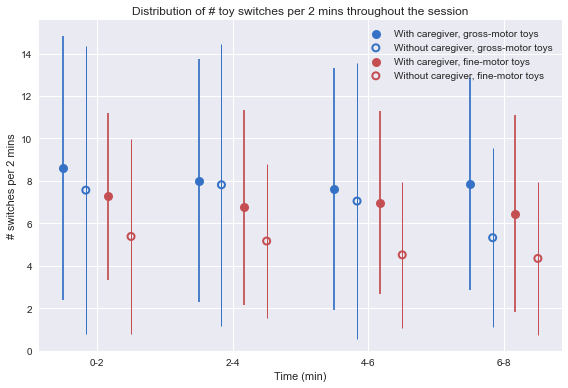

In [251]:
fig, ax = plt.subplots()
for i in range(4):
    if i == 0:
        ax.scatter([i*6], np.mean(y_s_mpm_2_min[i]), label = "With caregiver, gross-motor toys", facecolors='b', edgecolors='b', linewidths = 2) 
        ax.errorbar(i*6, np.mean(y_s_mpm_2_min[i]), yerr = np.std(y_s_mpm_2_min[i]), ecolor = 'b')

        ax.scatter([i*6 + 1], np.mean(y_s_nmm_2_min[i]), label = "Without caregiver, gross-motor toys", facecolors = 'none', edgecolors = 'b', linewidths = 2) 
        ax.errorbar(i*6 + 1, np.mean(y_s_nmm_2_min[i]), yerr = np.std(y_s_nmm_2_min[i]), ecolor = 'b', linestyle = 'dashed', elinewidth = 1)

        ax.scatter([i*6 + 2], np.mean(y_s_mps_2_min[i]), label = "With caregiver, fine-motor toys", facecolors = 'r', edgecolors = 'r', linewidths = 2) 
        ax.errorbar(i*6 + 2, np.mean(y_s_mps_2_min[i]), yerr = np.std(y_s_mps_2_min[i]), ecolor = 'r')

        ax.scatter([i*6 + 3], np.mean(y_s_nms_2_min[i]), label = "Without caregiver, fine-motor toys", facecolors = 'none', edgecolors = 'r', linewidths = 2) 
        ax.errorbar(i*6 + 3, np.mean(y_s_nms_2_min[i]), yerr = np.std(y_s_nms_2_min[i]), ecolor = 'r', linestyle = 'dashed', elinewidth = 1)



    else:
        ax.scatter([i*6], np.mean(y_s_mpm_2_min[i]),  edgecolors = 'b', facecolors = 'b', linewidths = 2) 
        ax.errorbar(i*6, np.mean(y_s_mpm_2_min[i]), yerr = np.std(y_s_mpm_2_min[i]), ecolor = 'b')

        ax.scatter([i*6 +1], np.mean(y_s_nmm_2_min[i]), edgecolors = 'b', facecolors = 'none', linewidths = 2) 
        ax.errorbar(i*6 + 1, np.mean(y_s_nmm_2_min[i]), yerr = np.std(y_s_nmm_2_min[i]), ecolor = 'b', linestyle = 'dashed', elinewidth = 1)

        ax.scatter([i*6 +2], np.mean(y_s_mps_2_min[i]),  edgecolors = 'r', facecolors = 'r', linewidths = 2) 
        ax.errorbar(i*6 + 2, np.mean(y_s_mps_2_min[i]), yerr = np.std(y_s_mps_2_min[i]), ecolor = 'r')

        ax.scatter([i*6 +3], np.mean(y_s_nms_2_min[i]),  edgecolors = 'r', facecolors = 'none', linewidths = 2) 
        ax.errorbar(i*6 + 3, np.mean(y_s_nms_2_min[i]), yerr = np.std(y_s_nms_2_min[i]), ecolor = 'r', linestyle = 'dashed', elinewidth = 1)



ax.set_title("Distribution of # toy switches per 2 mins throughout the session")
# ax.legend([mpm0["boxes"][0], nmm0["boxes"][0], mps0["boxes"][0], nms0['boxes'][0]], ['MPM', 'NMM', 'MPS', 'NMS'], loc='upper right')
ax.legend(loc = 0)
ax.set_xticks([1.5, 7.5, 13.5, 19.5])
ax.set_xticklabels(["0-2", "2-4", "4-6", "6-8"])
ax.set_xlabel("Time (min)")
ax.set_ylabel("# switches per 2 mins")
ax.set_ylim(bottom =0)
plt.tight_layout()

plt.show()

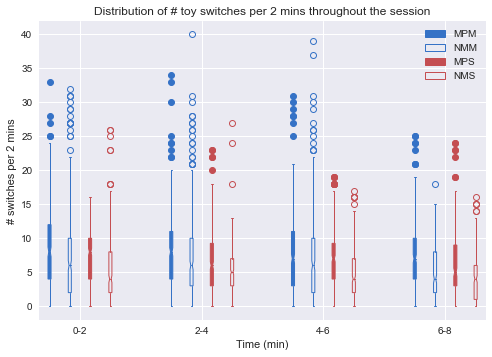

In [216]:
fig, ax = plt.subplots()
for i in range(4):
    if i == 0:
        mpm0 = ax.boxplot(y_s_mpm_2_min[i],positions= [i*6], notch=True, patch_artist=True, 
                    boxprops=dict(color='b', facecolor= 'b'),
                    capprops=dict(color='b'),
                    whiskerprops=dict(color='b'),
                    flierprops=dict(color='b', markeredgecolor='b',fillstyle='full',markerfacecolor='b'),
                    medianprops=dict(color='b'))

        nmm0 = ax.boxplot(y_s_nmm_2_min[i], positions= [i*6 +1], notch=True, patch_artist=True,
                    boxprops=dict(color='b', facecolor='none'),
                    capprops=dict(color='b'),
                    whiskerprops=dict(color='b'),
                    flierprops=dict(color='b', markeredgecolor='b'),
                    medianprops=dict(color='b'),) 

        mps0 = ax.boxplot(y_s_mps_2_min[i], positions= [i*6 +2], notch=True, patch_artist=True,
                    boxprops=dict( color='r',facecolor='r'),
                    capprops=dict(color='r'),
                    whiskerprops=dict(color='r'),
                    flierprops=dict(color='r', fillstyle='full', markeredgecolor='r',markerfacecolor='r'),
                    medianprops=dict(color='r'),)

        nms0 = ax.boxplot(y_s_nms_2_min[i], positions= [i*6 +3], notch=True, patch_artist=True, 
                    boxprops=dict(color='r', facecolor='none',),
                    capprops=dict(color='r'),
                    whiskerprops=dict(color='r'),
                    flierprops=dict(color='r', markeredgecolor='r'),
                    medianprops=dict(color='r'),)
    else:
        ax.boxplot(y_s_mpm_2_min[i],positions= [i*6], notch=True, patch_artist=True,
                    boxprops=dict(color='b', facecolor= 'b'),
                    capprops=dict(color='b'),
                    whiskerprops=dict(color='b'),
                    flierprops=dict(color='b', markeredgecolor='b',fillstyle='full',markerfacecolor='b'),
                    medianprops=dict(color='b'))

        ax.boxplot(y_s_nmm_2_min[i], positions= [i*6 +1], notch=True, patch_artist=True,
                    boxprops=dict(color='b', facecolor='none'),
                    capprops=dict(color='b'),
                    whiskerprops=dict(color='b'),
                    flierprops=dict(color='b', markeredgecolor='b'),
                    medianprops=dict(color='b'),) 

        ax.boxplot(y_s_mps_2_min[i], positions= [i*6 +2], notch=True, patch_artist=True,
                    boxprops=dict( color='r',facecolor='r'),
                    capprops=dict(color='r'),
                    whiskerprops=dict(color='r'),
                    flierprops=dict(color='r', fillstyle='full', markeredgecolor='r', markerfacecolor='r'),
                    medianprops=dict(color='r'),)

        ax.boxplot(y_s_nms_2_min[i], positions= [i*6 +3], notch=True, patch_artist=True,
                    
                    boxprops=dict(color='r', facecolor='none',),
                    capprops=dict(color='r'),
                    whiskerprops=dict(color='r'),
                    flierprops=dict(color='r', markeredgecolor='r'),
                    medianprops=dict(color='r'),)


ax.set_title("Distribution of # toy switches per 2 mins throughout the session")
ax.legend([mpm0["boxes"][0], nmm0["boxes"][0], mps0["boxes"][0], nms0['boxes'][0]], ['MPM', 'NMM', 'MPS', 'NMS'], loc='upper right')
ax.set_xticks([1.5, 7.5, 13.5, 19.5])
ax.set_xticklabels(["0-2", "2-4", "4-6", "6-8"])
ax.set_xlabel("Time (min)")
ax.set_ylabel("# switches per 2 mins")


plt.show()